# Note: This file runs only on 10% of random data for faster processing

## Let's check the environment first thing

In [1]:
import sys
sys.executable

'C:\\Users\\Mansoor\\anaconda3\\envs\\rainfall_prediction\\python.exe'

In [2]:
run_sample = True
sample_pct = 0.10

### Read and Display the data

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [5]:
# Date column is of no relevance here, hence dropping. It has unique value for each record

weather_data.drop('Date', axis=1, inplace=True)

## Step 1 – Exploratory Data Analysis 

In [6]:
weather_data.shape

(142193, 22)

In [7]:
weather_data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [8]:
weather_data['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

In [9]:
weather_sample = weather_data.sample(frac=sample_pct)
weather_sample['RainTomorrow'].value_counts(normalize=True)

No     0.772066
Yes    0.227934
Name: RainTomorrow, dtype: float64

In [10]:
weather_data.shape, weather_sample.shape

((142193, 22), (14219, 22))

In [11]:
weather_data.shape

(142193, 22)

In [12]:
# For testing purpose, run with 10% of data
if run_sample:
    weather_data = weather_sample.copy()

In [13]:
weather_data.shape

(14219, 22)

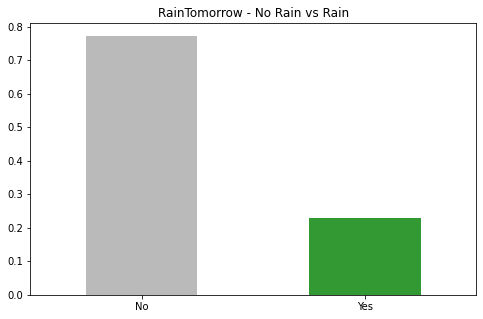

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))

weather_data['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', color = ['darkgrey', 'green'], alpha=0.8, rot=0)
plt.title('RainTomorrow - No Rain vs Rain')
plt.show()

In [15]:
from collections import Counter

Counter(weather_data['RainTomorrow'])

Counter({'No': 10978, 'Yes': 3241})

### Let's check for missing values

In [16]:
miss_pct = (weather_data.isnull().sum() * 100 / len(weather_data)).sort_values(ascending=False)
miss_sum = (weather_data.isnull().sum()).sort_values(ascending=False)

missing = pd.concat([miss_sum, miss_pct], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Sunshine,6814,47.921795
Evaporation,6111,42.977706
Cloud3pm,5648,39.721499
Cloud9am,5350,37.625712
Pressure9am,1405,9.881145
Pressure3pm,1403,9.867079
WindDir9am,1006,7.075040
WindGustDir,953,6.702300
WindGustSpeed,946,6.653070
WindDir3pm,373,2.623251


In [17]:
# nan_columns = missing[missing['Percent'] >= 35].index.tolist()
# nan_columns

## Step 2 – Feature Engineering

> We need to predict 'RainTomorrow' based on other dependent features. Let's convert RainToday and RainTomorrow from Yes/No to 1/0

In [18]:
weather_data['RainToday'].replace({'Yes': 1, 'No': 0}, inplace=True)
weather_data['RainTomorrow'].replace({'Yes': 1, 'No': 0}, inplace=True)

weather_data.head(20)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45294,Canberra,0.0,15.0,0.0,2.6,7.1,NNW,15.0,SE,NNW,6.0,9.0,87.0,44.0,1022.0,1019.5,7.0,7.0,6.6,14.0,0.0,0
128454,Hobart,7.2,12.4,15.0,4.2,2.8,WNW,57.0,NNW,S,22.0,6.0,61.0,58.0,995.2,992.7,NaN,NaN,10.5,11.6,1.0,1
12988,Moree,16.9,31.2,0.0,8.4,11.9,SSW,37.0,NE,NNW,20.0,9.0,59.0,37.0,1018.1,1015.1,1.0,4.0,22.4,29.8,0.0,0
100347,Nuriootpa,15.6,39.6,0.0,10.4,NaN,NW,52.0,NNE,NW,20.0,19.0,10.0,5.0,1015.0,1011.6,3.0,4.0,29.6,38.4,0.0,0
97309,MountGambier,11.4,21.3,16.6,3.4,11.3,SSE,48.0,SW,S,24.0,30.0,82.0,54.0,1006.7,1009.1,5.0,6.0,15.0,19.4,1.0,0
30270,Sydney,18.0,25.2,0.0,5.4,5.9,NaN,NaN,W,E,11.0,15.0,78.0,57.0,1025.7,1022.4,7.0,2.0,19.7,24.5,0.0,0
66196,Melbourne,12.4,16.2,8.0,4.6,2.1,N,70.0,NNE,NNW,41.0,22.0,60.0,72.0,1002.6,999.0,7.0,7.0,14.2,14.3,1.0,1
66747,Melbourne,6.1,16.0,0.0,1.6,1.0,NW,33.0,N,NW,15.0,11.0,79.0,60.0,1019.5,1015.2,NaN,NaN,7.9,14.9,0.0,0
19686,NorahHead,18.6,23.6,0.0,NaN,NaN,S,43.0,ESE,ENE,15.0,20.0,74.0,66.0,1021.8,1019.2,NaN,NaN,21.5,23.3,0.0,0
36838,WaggaWagga,9.0,24.9,0.0,6.6,12.8,E,48.0,E,E,33.0,20.0,49.0,35.0,1021.9,1017.9,1.0,4.0,16.1,23.9,0.0,0


In [19]:
weather_data.shape

(14219, 22)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = weather_data['RainTomorrow']
X = weather_data.drop('RainTomorrow', axis=1)
X.shape

(14219, 21)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9953, 21), (9953,), (4266, 21), (4266,))

In [23]:
142193* .1 * .7

9953.51

In [24]:
miss_pct = (X_train.isnull().sum() * 100 / len(X_train)).sort_values(ascending=False)
miss_sum = (X_train.isnull().sum()).sort_values(ascending=False)

missing = pd.concat([miss_sum, miss_pct], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Sunshine,4691,47.131518
Evaporation,4208,42.278710
Cloud3pm,3900,39.184166
Cloud9am,3691,37.084296
Pressure9am,997,10.017080
Pressure3pm,997,10.017080
WindDir9am,705,7.083291
WindGustDir,665,6.681403
WindGustSpeed,658,6.611072
Humidity3pm,250,2.511805


### Label Encoding the Categorical features

In [25]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [26]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
categorical_columns, len(categorical_columns)

(Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object'),
 4)

In [27]:
numerical_columns = X_train.select_dtypes(exclude=['object']).columns
numerical_columns, len(numerical_columns)

(Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
        'Temp9am', 'Temp3pm', 'RainToday'],
       dtype='object'),
 17)

In [28]:
X_train[categorical_columns]

,Location,WindGustDir,WindDir9am,WindDir3pm
124341,Walpole,NE,NaN,SSW
93408,Townsville,ENE,ESE,NE
67310,Melbourne,SSE,SW,S
115208,PerthAirport,NW,NNE,NNW
82588,Brisbane,W,W,W
...,...,...,...,...
101031,Nuriootpa,W,SW,SW
17380,Newcastle,NaN,NaN,NaN
44804,Canberra,NW,S,NNW
79668,Dartmoor,SW,WNW,SW


In [29]:
X_train[categorical_columns].isnull().sum()

Location         0
WindGustDir    665
WindDir9am     705
WindDir3pm     247
dtype: int64

In [30]:
from pickle import dump
lencoders = {}
le_mapping = {}

for col in categorical_columns:
    lencoders[col] = LabelEncoderExt()
    lencoders[col].fit(X_train[col])
    le_mapping[col] = dict(zip(lencoders[col].classes_, lencoders[col].transform(lencoders[col].classes_)))
    X_train[col] = lencoders[col].transform(X_train[col].astype('str'))
    X_test[col] = lencoders[col].transform(X_test[col].astype('str'))
    

    
dump(le_mapping, open('le_mapping.pkl', 'wb'))

In [31]:
print(le_mapping)

{'Location': {'Adelaide': 0, 'Albany': 1, 'Albury': 2, 'AliceSprings': 3, 'BadgerysCreek': 4, 'Ballarat': 5, 'Bendigo': 6, 'Brisbane': 7, 'Cairns': 8, 'Canberra': 9, 'Cobar': 10, 'CoffsHarbour': 11, 'Dartmoor': 12, 'Darwin': 13, 'GoldCoast': 14, 'Hobart': 15, 'Katherine': 16, 'Launceston': 17, 'Melbourne': 18, 'MelbourneAirport': 19, 'Mildura': 20, 'Moree': 21, 'MountGambier': 22, 'MountGinini': 23, 'Newcastle': 24, 'Nhil': 25, 'NorahHead': 26, 'NorfolkIsland': 27, 'Nuriootpa': 28, 'PearceRAAF': 29, 'Penrith': 30, 'Perth': 31, 'PerthAirport': 32, 'Portland': 33, 'Richmond': 34, 'Sale': 35, 'SalmonGums': 36, 'Sydney': 37, 'SydneyAirport': 38, 'Townsville': 39, 'Tuggeranong': 40, 'Uluru': 41, 'Unknown': 42, 'WaggaWagga': 43, 'Walpole': 44, 'Watsonia': 45, 'Williamtown': 46, 'Witchcliffe': 47, 'Wollongong': 48, 'Woomera': 49}, 'WindGustDir': {'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 11, 'SW': 12, 'Unknown': 13, 'W': 14, '

In [32]:
le_mapping['Location']

{'Adelaide': 0,
 'Albany': 1,
 'Albury': 2,
 'AliceSprings': 3,
 'BadgerysCreek': 4,
 'Ballarat': 5,
 'Bendigo': 6,
 'Brisbane': 7,
 'Cairns': 8,
 'Canberra': 9,
 'Cobar': 10,
 'CoffsHarbour': 11,
 'Dartmoor': 12,
 'Darwin': 13,
 'GoldCoast': 14,
 'Hobart': 15,
 'Katherine': 16,
 'Launceston': 17,
 'Melbourne': 18,
 'MelbourneAirport': 19,
 'Mildura': 20,
 'Moree': 21,
 'MountGambier': 22,
 'MountGinini': 23,
 'Newcastle': 24,
 'Nhil': 25,
 'NorahHead': 26,
 'NorfolkIsland': 27,
 'Nuriootpa': 28,
 'PearceRAAF': 29,
 'Penrith': 30,
 'Perth': 31,
 'PerthAirport': 32,
 'Portland': 33,
 'Richmond': 34,
 'Sale': 35,
 'SalmonGums': 36,
 'Sydney': 37,
 'SydneyAirport': 38,
 'Townsville': 39,
 'Tuggeranong': 40,
 'Uluru': 41,
 'Unknown': 42,
 'WaggaWagga': 43,
 'Walpole': 44,
 'Watsonia': 45,
 'Williamtown': 46,
 'Witchcliffe': 47,
 'Wollongong': 48,
 'Woomera': 49}

In [33]:
X_train[categorical_columns].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [34]:
X_train[categorical_columns]

,Location,WindGustDir,WindDir9am,WindDir3pm
124341,44,4,17,11
93408,39,1,2,4
67310,18,10,12,8
115208,32,7,5,6
82588,7,14,14,14
...,...,...,...,...
101031,28,14,12,12
17380,24,17,17,17
44804,9,7,8,6
79668,12,12,15,12


### WindGustDir had 6585 missing values on full data, did they get encoded with 16? Lets check!

In [35]:
X_train['WindGustDir'].value_counts().sort_index()[-1:]

17    665
Name: WindGustDir, dtype: int64

In [36]:
for col in categorical_columns:
    #print(col)
    print(X_train[col].value_counts().sort_index()[-1:])
    print('--' * 60)

49    211
Name: Location, dtype: int64
------------------------------------------------------------------------------------------------------------------------
17    665
Name: WindGustDir, dtype: int64
------------------------------------------------------------------------------------------------------------------------
17    705
Name: WindDir9am, dtype: int64
------------------------------------------------------------------------------------------------------------------------
17    247
Name: WindDir3pm, dtype: int64
------------------------------------------------------------------------------------------------------------------------


In [37]:
X_train['WindDir3pm'].value_counts().sort_index()

0     597
1     554
2     577
3     603
4     609
5     456
6     569
7     559
8     698
9     770
10    631
11    549
12    653
14    655
15    610
16    616
17    247
Name: WindDir3pm, dtype: int64

> WindDir3pm, WindDir9am, WindGustDir - For these features, the value of 16 would imply a NaN, so this has to be replaced during Impuation of missing values.

### Lets use KNN Imputer to impute missing values, but before that we need to normalize the data

In [38]:
X_train.isnull().sum()

Location            0
MinTemp            47
MaxTemp            16
Rainfall          106
Evaporation      4208
Sunshine         4691
WindGustDir         0
WindGustSpeed     658
WindDir9am          0
WindDir3pm          0
WindSpeed9am       97
WindSpeed3pm      175
Humidity9am       132
Humidity3pm       250
Pressure9am       997
Pressure3pm       997
Cloud9am         3691
Cloud3pm         3900
Temp9am            64
Temp3pm           177
RainToday         106
dtype: int64

In [39]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
124341,44,11.3,20.1,1.4,NaN,NaN,4,20.0,17,11,0.0,6.0,99.0,66.0,1019.1,1015.6,NaN,NaN,13.3,19.0,1.0
93408,39,22.7,30.8,0.0,7.6,11.1,1,31.0,2,4,13.0,24.0,68.0,65.0,1016.8,1013.7,1.0,2.0,28.0,29.9,0.0
67310,18,9.3,14.9,NaN,0.6,5.9,10,41.0,12,8,11.0,17.0,78.0,82.0,1021.7,1018.9,NaN,NaN,10.3,11.7,NaN
115208,32,7.1,22.8,0.0,2.6,6.8,7,37.0,5,6,9.0,17.0,65.0,38.0,1013.0,1007.6,1.0,7.0,13.3,20.8,0.0
82588,7,17.3,28.1,57.4,3.8,12.3,14,48.0,14,14,17.0,24.0,64.0,31.0,1002.6,1003.6,7.0,1.0,24.1,27.2,1.0


In [40]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from pickle import dump, load

scaler = {}

for col in numerical_columns:
    scaler[col] = MinMaxScaler()
    X_train[col] = scaler[col].fit_transform(np.array(X_train[col]).reshape(-1, 1))
    X_test[col]  = scaler[col].transform(np.array(X_test[col]).reshape(-1, 1))

dump(scaler, open('scaler.pkl', 'wb'))  

In [41]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
124341,44,0.475196,0.461386,0.005833,NaN,NaN,4,0.087302,17,11,0.000000,0.092308,0.989796,0.656566,0.596623,0.599641,NaN,NaN,0.422819,0.464,1.0
93408,39,0.772846,0.673267,0.000000,0.110465,0.776224,1,0.174603,2,4,0.175676,0.369231,0.673469,0.646465,0.553471,0.565530,0.125,0.250,0.751678,0.682,0.0
67310,18,0.422977,0.358416,NaN,0.008721,0.412587,10,0.253968,12,8,0.148649,0.261538,0.775510,0.818182,0.645403,0.658887,NaN,NaN,0.355705,0.318,NaN
115208,32,0.365535,0.514851,0.000000,0.037791,0.475524,7,0.222222,5,6,0.121622,0.261538,0.642857,0.373737,0.482176,0.456014,0.125,0.875,0.422819,0.500,0.0
82588,7,0.631854,0.619802,0.239167,0.055233,0.860140,14,0.309524,14,14,0.229730,0.369231,0.632653,0.303030,0.287054,0.384201,0.875,0.125,0.664430,0.628,1.0


In [42]:
from datetime import datetime
print(datetime.now())

2021-10-12 20:15:38.780048


In [43]:
from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5, weights='uniform', missing_values=np.nan)
new_array = imputer.fit_transform(X_train)
X_train = pd.DataFrame(data=new_array, columns=X_train.columns, index=X_train.index)
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
124341,44.0,0.475196,0.461386,0.005833,0.100000,0.345455,4.0,0.087302,17.0,11.0,0.000000,0.092308,0.989796,0.656566,0.596623,0.599641,0.625,0.650,0.422819,0.464,1.0
93408,39.0,0.772846,0.673267,0.000000,0.110465,0.776224,1.0,0.174603,2.0,4.0,0.175676,0.369231,0.673469,0.646465,0.553471,0.565530,0.125,0.250,0.751678,0.682,0.0
67310,18.0,0.422977,0.358416,0.001000,0.008721,0.412587,10.0,0.253968,12.0,8.0,0.148649,0.261538,0.775510,0.818182,0.645403,0.658887,0.600,0.675,0.355705,0.318,0.0
115208,32.0,0.365535,0.514851,0.000000,0.037791,0.475524,7.0,0.222222,5.0,6.0,0.121622,0.261538,0.642857,0.373737,0.482176,0.456014,0.125,0.875,0.422819,0.500,0.0
82588,7.0,0.631854,0.619802,0.239167,0.055233,0.860140,14.0,0.309524,14.0,14.0,0.229730,0.369231,0.632653,0.303030,0.287054,0.384201,0.875,0.125,0.664430,0.628,1.0


In [44]:
X_train.shape

(9953, 21)

In [45]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
37269,43,0.516971,0.728713,0.000000,0.122093,0.916084,15,0.293651,0,7,0.148649,0.200000,0.428571,0.101010,0.465291,0.439856,0.125,0.125,0.577181,0.736,0.0
32454,37,0.443864,0.455446,0.000000,0.046512,0.608392,16,0.357143,14,14,0.324324,0.292308,0.520408,0.333333,0.660413,0.691203,0.125,0.625,0.425056,0.470,0.0
26281,30,0.357702,0.520792,0.000000,NaN,NaN,15,0.460317,3,16,0.202703,0.430769,0.510204,0.272727,NaN,NaN,NaN,NaN,0.496644,0.504,0.0
17098,24,0.624021,0.601980,0.001667,NaN,NaN,17,NaN,17,17,0.000000,NaN,0.775510,NaN,NaN,NaN,0.000,NaN,0.617450,NaN,0.0
67273,18,0.462141,0.483168,NaN,0.040698,0.440559,7,0.269841,6,6,0.202703,0.307692,0.734694,0.434343,0.636023,0.649910,NaN,NaN,0.436242,0.476,NaN


In [46]:
new_array1 = imputer.transform(X_test)
X_test = pd.DataFrame(data=new_array1, columns=X_test.columns, index=X_test.index)
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
37269,43.0,0.516971,0.728713,0.000000,0.122093,0.916084,15.0,0.293651,0.0,7.0,0.148649,0.200000,0.428571,0.101010,0.465291,0.439856,0.125,0.125,0.577181,0.7360,0.0
32454,37.0,0.443864,0.455446,0.000000,0.046512,0.608392,16.0,0.357143,14.0,14.0,0.324324,0.292308,0.520408,0.333333,0.660413,0.691203,0.125,0.625,0.425056,0.4700,0.0
26281,30.0,0.357702,0.520792,0.000000,0.045349,0.507692,15.0,0.460317,3.0,16.0,0.202703,0.430769,0.510204,0.272727,0.551595,0.590305,0.550,0.600,0.496644,0.5040,0.0
17098,24.0,0.624021,0.601980,0.001667,0.099419,0.479720,17.0,0.365079,17.0,17.0,0.000000,0.000000,0.775510,0.521212,0.551220,0.628725,0.000,0.450,0.617450,0.5356,0.0
67273,18.0,0.462141,0.483168,0.003000,0.040698,0.440559,7.0,0.269841,6.0,6.0,0.202703,0.307692,0.734694,0.434343,0.636023,0.649910,0.525,0.875,0.436242,0.4760,0.2


In [47]:
from datetime import datetime
print(datetime.now())

2021-10-12 20:16:01.848637


In [48]:
miss_train = (X_train.isnull().sum()).sort_values(ascending=False)
miss_train.isnull().any()

False

In [49]:
miss_test = (X_train.isnull().sum()).sort_values(ascending=False)
miss_test.isnull().any()

False

In [50]:
weather_data['RainTomorrow'].value_counts(normalize=True)

0    0.772066
1    0.227934
Name: RainTomorrow, dtype: float64

In [51]:
y.value_counts(normalize=True)

0    0.772066
1    0.227934
Name: RainTomorrow, dtype: float64

### Check if any columns has VIF. Note: Correlation is NOT affected by scaling.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = pd.DataFrame(
                {'feature' : X_train.columns,
                 'vif' : [variance_inflation_factor(X_train.values, i) for i  in range(X_train.shape[1])]                   
                }).sort_values(by='vif', ascending=False)
vif_values

,feature,vif
15,Pressure3pm,441.927594
2,MaxTemp,399.583189
14,Pressure9am,398.522588
19,Temp3pm,391.069050
18,Temp9am,248.449440
1,MinTemp,78.528362
12,Humidity9am,46.484829
13,Humidity3pm,33.021263
7,WindGustSpeed,13.272198
5,Sunshine,12.359421


<AxesSubplot:>

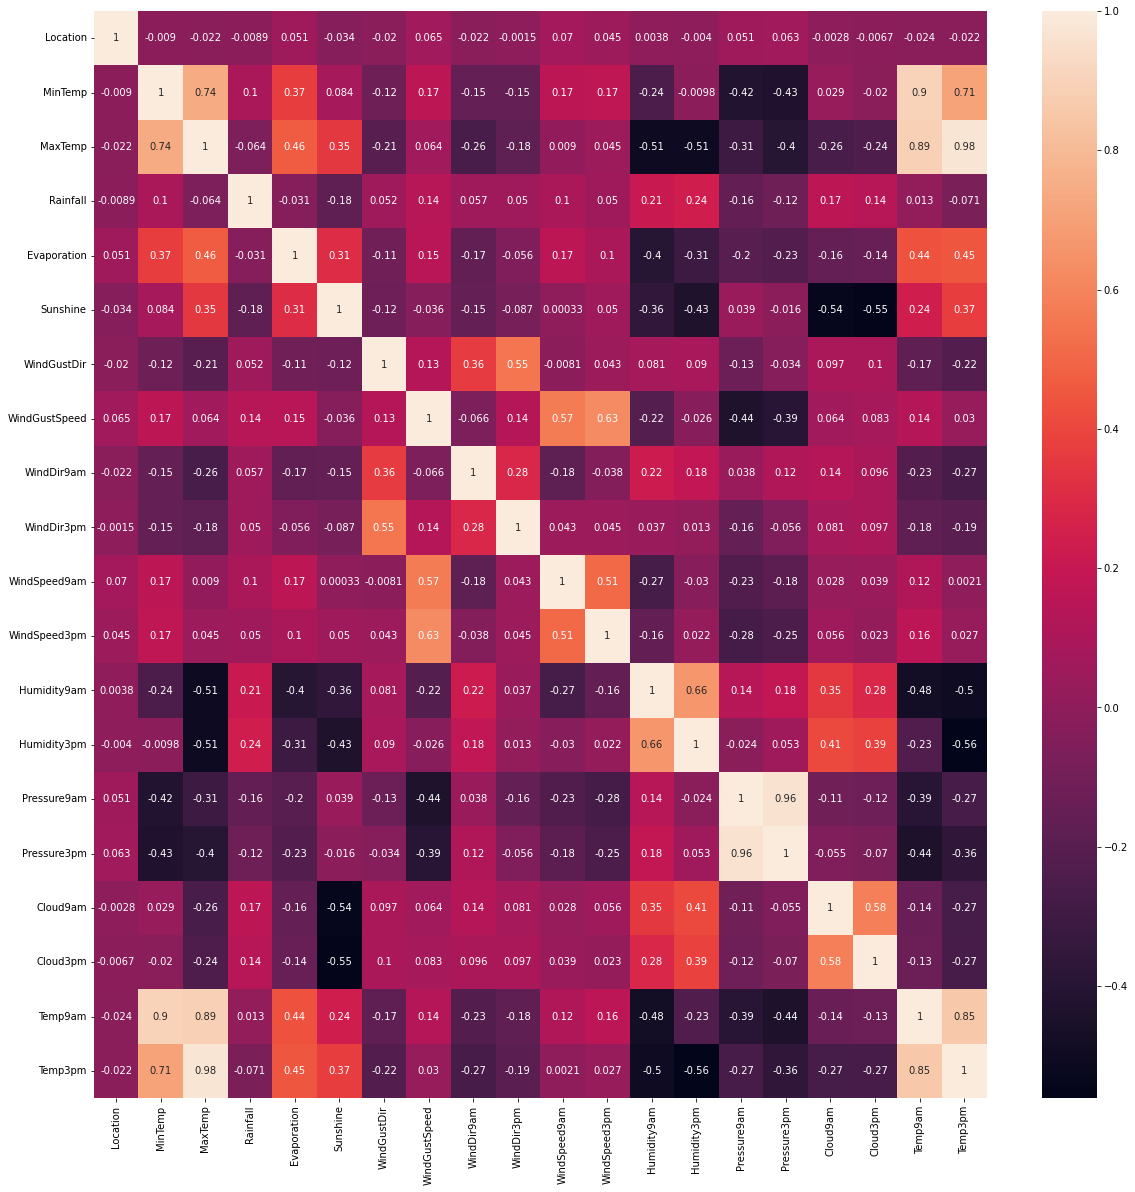

In [53]:
import seaborn as sns
corr=X_train.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X_train[top_features].corr(),annot=True)

In [54]:
corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Location,1.000000,-0.008986,-0.021822,-0.008922,0.050608,-0.033864,-0.020063,0.064651,-0.021718,-0.001465,0.069631,0.044695,0.003754,-0.004014,0.050708,0.062975,-0.002818,-0.006744,-0.024122,-0.021897
MinTemp,-0.008986,1.000000,0.742275,0.102221,0.371568,0.083637,-0.122578,0.169117,-0.153439,-0.154440,0.170450,0.171389,-0.244511,-0.009802,-0.418351,-0.431461,0.029255,-0.019761,0.901303,0.709945
MaxTemp,-0.021822,0.742275,1.000000,-0.064338,0.463799,0.352776,-0.206754,0.064131,-0.260349,-0.181148,0.008955,0.044579,-0.507087,-0.509001,-0.309302,-0.397581,-0.260032,-0.238014,0.886379,0.975197
Rainfall,-0.008922,0.102221,-0.064338,1.000000,-0.031290,-0.175241,0.052471,0.141186,0.057096,0.049528,0.102302,0.050206,0.209968,0.238959,-0.163074,-0.124417,0.165724,0.143273,0.013319,-0.070977
Evaporation,0.050608,0.371568,0.463799,-0.031290,1.000000,0.306942,-0.111811,0.151165,-0.166853,-0.055691,0.165391,0.100929,-0.397708,-0.306030,-0.204930,-0.225222,-0.156049,-0.142295,0.436175,0.449787
Sunshine,-0.033864,0.083637,0.352776,-0.175241,0.306942,1.000000,-0.116463,-0.036056,-0.152527,-0.087295,0.000328,0.050183,-0.359094,-0.434417,0.039143,-0.016352,-0.537241,-0.554510,0.238845,0.369380
WindGustDir,-0.020063,-0.122578,-0.206754,0.052471,-0.111811,-0.116463,1.000000,0.129029,0.364271,0.554188,-0.008111,0.042851,0.080702,0.090306,-0.129249,-0.034021,0.097075,0.102908,-0.171992,-0.223971
WindGustSpeed,0.064651,0.169117,0.064131,0.141186,0.151165,-0.036056,0.129029,1.000000,-0.066440,0.137142,0.572349,0.627667,-0.216346,-0.025524,-0.438779,-0.394299,0.064190,0.082990,0.140086,0.029891
WindDir9am,-0.021718,-0.153439,-0.260349,0.057096,-0.166853,-0.152527,0.364271,-0.066440,1.000000,0.283187,-0.181714,-0.038130,0.224557,0.179421,0.037970,0.116080,0.139037,0.095987,-0.225176,-0.266423
WindDir3pm,-0.001465,-0.154440,-0.181148,0.049528,-0.055691,-0.087295,0.554188,0.137142,0.283187,1.000000,0.043445,0.044927,0.037273,0.012830,-0.157011,-0.055855,0.080503,0.096638,-0.176064,-0.194940


In [55]:
for row in corr.index:
    for col in corr.columns:
        if abs(corr.loc[row, col]) > 0.7 and row != col:
            print(row, col, round(corr.loc[row, col], 4))

MinTemp MaxTemp 0.7423
MinTemp Temp9am 0.9013
MinTemp Temp3pm 0.7099
MaxTemp MinTemp 0.7423
MaxTemp Temp9am 0.8864
MaxTemp Temp3pm 0.9752
Pressure9am Pressure3pm 0.9599
Pressure3pm Pressure9am 0.9599
Temp9am MinTemp 0.9013
Temp9am MaxTemp 0.8864
Temp9am Temp3pm 0.8549
Temp3pm MinTemp 0.7099
Temp3pm MaxTemp 0.9752
Temp3pm Temp9am 0.8549


In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9953, 21), (9953,), (4266, 21), (4266,))

In [57]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
124341,44.0,0.475196,0.461386,0.005833,0.100000,0.345455,4.0,0.087302,17.0,11.0,0.000000,0.092308,0.989796,0.656566,0.596623,0.599641,0.625,0.650,0.422819,0.464,1.0
93408,39.0,0.772846,0.673267,0.000000,0.110465,0.776224,1.0,0.174603,2.0,4.0,0.175676,0.369231,0.673469,0.646465,0.553471,0.565530,0.125,0.250,0.751678,0.682,0.0
67310,18.0,0.422977,0.358416,0.001000,0.008721,0.412587,10.0,0.253968,12.0,8.0,0.148649,0.261538,0.775510,0.818182,0.645403,0.658887,0.600,0.675,0.355705,0.318,0.0
115208,32.0,0.365535,0.514851,0.000000,0.037791,0.475524,7.0,0.222222,5.0,6.0,0.121622,0.261538,0.642857,0.373737,0.482176,0.456014,0.125,0.875,0.422819,0.500,0.0
82588,7.0,0.631854,0.619802,0.239167,0.055233,0.860140,14.0,0.309524,14.0,14.0,0.229730,0.369231,0.632653,0.303030,0.287054,0.384201,0.875,0.125,0.664430,0.628,1.0


In [58]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
37269,43.0,0.516971,0.728713,0.000000,0.122093,0.916084,15.0,0.293651,0.0,7.0,0.148649,0.200000,0.428571,0.101010,0.465291,0.439856,0.125,0.125,0.577181,0.7360,0.0
32454,37.0,0.443864,0.455446,0.000000,0.046512,0.608392,16.0,0.357143,14.0,14.0,0.324324,0.292308,0.520408,0.333333,0.660413,0.691203,0.125,0.625,0.425056,0.4700,0.0
26281,30.0,0.357702,0.520792,0.000000,0.045349,0.507692,15.0,0.460317,3.0,16.0,0.202703,0.430769,0.510204,0.272727,0.551595,0.590305,0.550,0.600,0.496644,0.5040,0.0
17098,24.0,0.624021,0.601980,0.001667,0.099419,0.479720,17.0,0.365079,17.0,17.0,0.000000,0.000000,0.775510,0.521212,0.551220,0.628725,0.000,0.450,0.617450,0.5356,0.0
67273,18.0,0.462141,0.483168,0.003000,0.040698,0.440559,7.0,0.269841,6.0,6.0,0.202703,0.307692,0.734694,0.434343,0.636023,0.649910,0.525,0.875,0.436242,0.4760,0.2


In [59]:
#Lets save train and test data at this point for later use

train = pd.concat([X_train, y_train], axis=1)
train.to_csv('data_train_10pct.csv', index=False)

test = pd.concat([X_test, y_test], axis=1)
test.to_csv('data_test_10pct.csv', index=False)